In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Sulabh Jha
- PRN : 230940128031

# Deep Neural Networks 
## Assignment A01

## Implement of MP Neuron

<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## 1. Import Statements

In [13]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
 
%matplotlib inline

## 2. Setup Global Parameters

In [16]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE= 0.2
NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [17]:
df = pd.read_csv('breast_cancer_mod.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [18]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [21]:
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

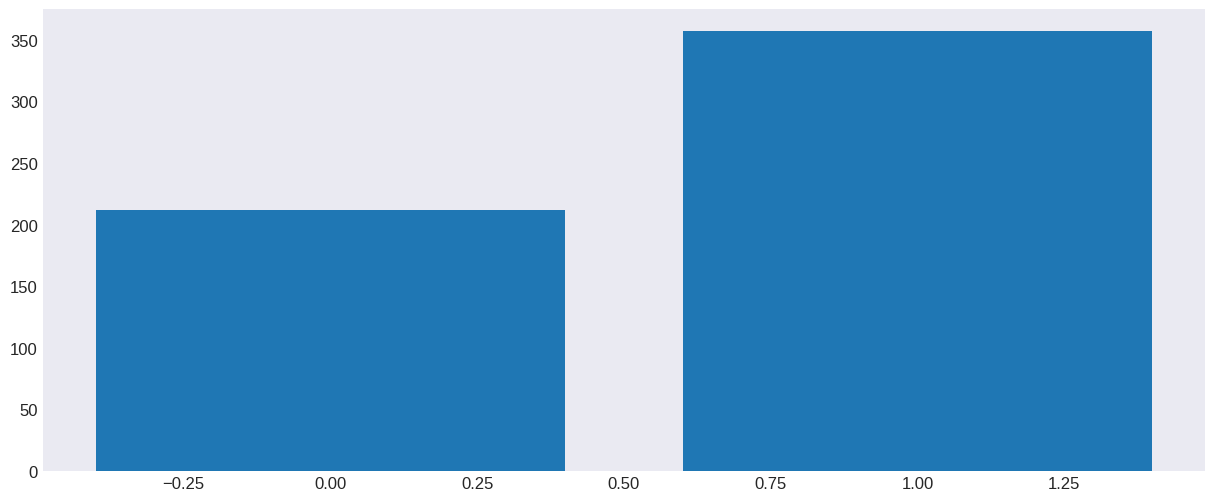

In [22]:
fig, ax = plt.subplots()

ax.bar(df.target.value_counts().index, df.target.value_counts().values)
ax.grid()

([<matplotlib.patches.Wedge at 0x7f7e4b566080>,
 [Text(-0.4286546999573329, 1.0130425204326268, ''),
  Text(0.428654605109445, -1.013042560566172, '')])

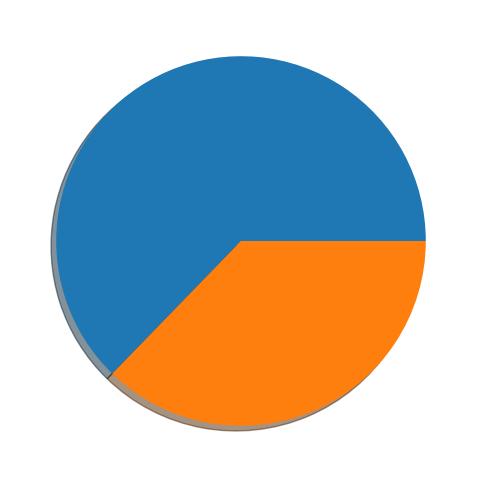

In [23]:
fig, ax = plt.subplots()

ax.pie(df.target.value_counts(), shadow=True)

In [24]:
featires_df= df.drop('target', axis=1)
labels_df= df['target']
featires_df.shape, labels_df.shape

((569, 30), (569,))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(featires_df, labels_df,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=labels_df
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [26]:
x_train['total']= x_train.astype('int64').sum(axis=1)
x_test['total']= x_test.astype('int64').sum(axis=1)

x_train['target'] = y_train
x_test['target'] = y_test

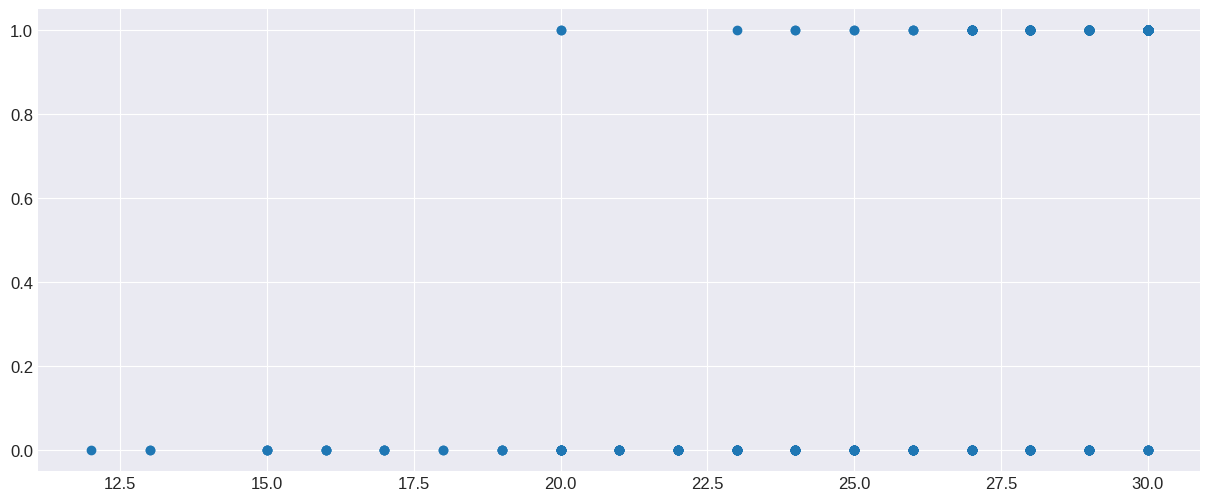

In [27]:
plt.scatter(x_train['total'], x_train['target'])

In [28]:
np.log(1)

0.0

<Axes: xlabel='total'>

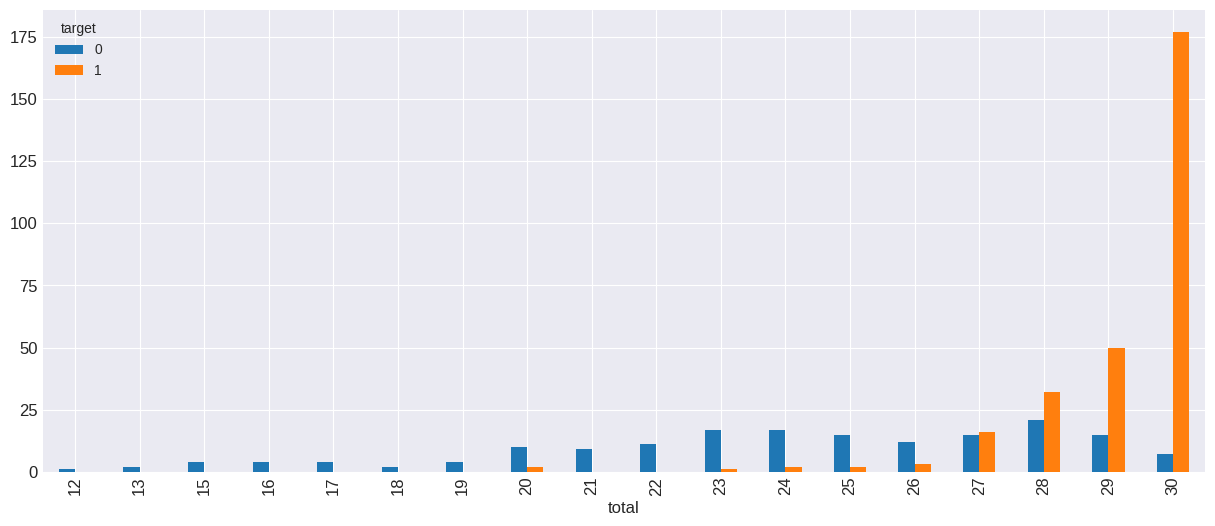

In [29]:
tmp_df = x_train.groupby(['total', 'target']).agg({'target':'count'})
tmp_df.columns=['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total', columns='target', values='count').plot(kind='bar')

In [30]:
accuracy = {}

#loop over all the columns

for b in range(x_train.shape[1]-1):
    x_train['pred'] = x_train['total'] >=b
    accuracy[b]= accuracy_score(x_train['pred'], x_train['target'])
    
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473}

In [31]:
best_b = max(accuracy, key= accuracy.get)
best_b

27

In [32]:
x_test['pred']= x_test['total']>=best_b
accuracy_score(x_test['pred'], x_test['target'])

0.868421052631579